## data Visualization

0    16537
1     4840
Name: label, dtype: int64


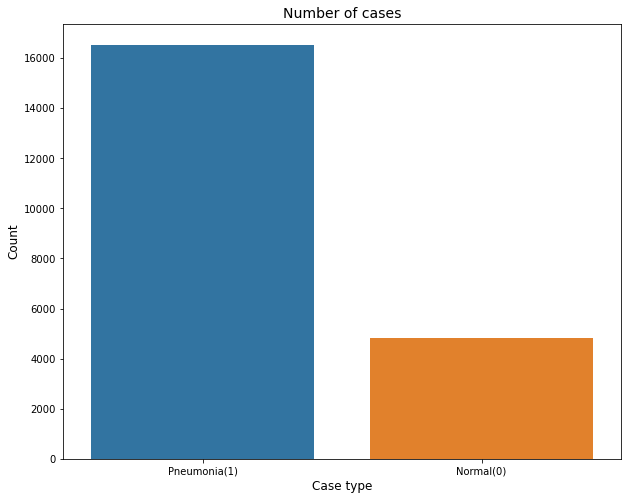

,image,label
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6.jpg,0
1,0010f549-b242-4e94-87a8-57d79de215fc.jpg,0
2,0022995a-45eb-4cfa-9a59-cd15f5196c64.jpg,0
3,0025d2de-bd78-4d36-9f72-e15a5e22ca82.jpg,0
4,00322d4d-1c29-4943-afc9-b6754be640eb.jpg,0
...,...,...
21372,ffa424d2-6e6b-4eed-93ab-7551e8941215.jpg,1
21373,ffae40ab-fcfe-4311-a74a-89f605dba48b.jpg,1
21374,ffd787b6-59ca-48cb-bd15-bcedd52cf37c.jpg,1
21375,fff0b503-72a5-446a-843d-f3d152e39053.jpg,1


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.image as mimg
import os
import matplotlib.pyplot as plt
from tqdm import tqdm


train_dir = r"F:\pneumonia\000 P R O J E C T S\pneumonia\New folder\dataset\train"
val_dir = r"F:\pneumonia\000 P R O J E C T S\pneumonia\New folder\dataset\val"

normal_dir = os.path.join( train_dir , "0")
pneumonia_dir = os.path.join( train_dir , "1")

normal_case = []
for dirname, dirnames, filenames in os.walk(normal_dir):
        for filename in filenames:
            normal_case.append(filename)

pneumonia_case = []
for dirname, dirnames, filenames in os.walk(pneumonia_dir):
        for filename in filenames:
            pneumonia_case.append(filename)


train_data = []

for img in normal_case:
    train_data.append((img,0))

for img in pneumonia_case:
    train_data.append((img, 1))

train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Pneumonia(1)' , 'Normal(0)'])
plt.savefig("before aug.png")
plt.show()


train_data

## sample images

for normal case:


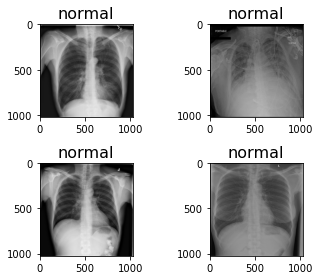

for pneumonia :


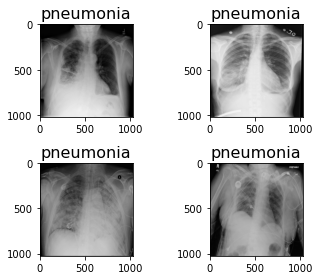

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


# for normal case: 
print( 'for normal case:')

rows = 2
cols = 2
axes=[]
fig=plt.figure()

for a in range(rows*cols):
    n1 = train_data.loc[train_data['label'] == 0]
    r1 = random.randint(0, n1.shape[0]) 

    img = mpimg.imread((os.path.join( normal_dir , n1.iloc[r1,0] )) )

    axes.append( fig.add_subplot(rows, cols, a+1) )
    plt.title('normal',fontsize=16)
    plt.imshow( img, cmap = "gray" )
    fig.tight_layout() 

plt.savefig("normal cases.png")
plt.show()

# for pneumonia
print( 'for pneumonia :')

rows = 2
cols = 2
axes=[]
fig=plt.figure()

for a in range(rows*cols):
    n0 = train_data.loc[train_data['label'] == 1]
    r0 = random.randint(0, n0.shape[0]) 

    img = mpimg.imread((os.path.join( pneumonia_dir , n0.iloc[r0,0] )) )
    axes.append( fig.add_subplot(rows, cols, a+1) )
    plt.title('pneumonia',fontsize=16)
    plt.imshow( img, cmap = "gray" )
    fig.tight_layout()    

plt.savefig("pneumonia cases.png")
plt.show()

# lebel 1  has much fewer data samples than lebel 0. so we augment existing data. (only in training samples)


In [32]:
import os
import shutil
from math import ceil, floor
import numpy as np
import cv2
import random



# directory for augmentation
#normal_dir = r"F:\pneumonia\000 P R O J E C T S\pneumonia\New folder\dataset\train\1 - Copy"

for dirname, dirnames, filenames in os.walk(pneumonia_dir):
        for filename in tqdm(filenames):
            img = cv2.imread( os.path.join(normal_dir ,filename))
            filename = filename.replace('.jpg' , '')
            
            # image rotation changes rotation (-10,10)
            angle =  random.randint(-10, 10)###
            image_operation1 = img.copy()
            row,col = image_operation1.shape[:2]
            center= tuple(np.array([row,col])/2)
            rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
            rotated_image = cv2.warpAffine(image_operation1, rot_mat, (col,row))

            image_name1 = filename + "rotated" + ".jpg"#
            img_dir = os.path.join(normal_dir ,image_name1)
            cv2.imwrite( img_dir  , rotated_image)

            #changing brightness changes brightess 25%
            value = 25.0
            image_operation2 = img.copy()
            bright_image= cv2.add(image_operation2,np.array([value]))
            image_name2 = filename + "bright" + ".jpg"#
            img_dir = os.path.join(normal_dir ,image_name2)
            cv2.imwrite( img_dir  , bright_image)
            
r'''
normal_dir = r"F:\pneumonia\000 P R O J E C T S\pneumonia\New folder\dataset\train"
filename = "000db696-cf54-4385-b10b-6b16fbb3f985.jpg"
img = cv2.imread( os.path.join(normal_dir ,filename))

filename = filename.replace('.jpg' , '')
print(filename)

# image rotation
angle =  random.randint(-70, 70)###
image_operation1 = img.copy()
row,col = image_operation1.shape[:2]
center= tuple(np.array([row,col])/2)
rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
rotated_image = cv2.warpAffine(image_operation1, rot_mat, (col,row))

image_name1 = filename + "rotated" + ".jpg"#
img_dir = os.path.join(normal_dir ,image_name1)
cv2.imwrite( img_dir  , rotated_image)

#changing brightness 
value = 50.0
image_operation2 = img.copy()
bright_image= cv2.add(image_operation2,np.array([value]))
image_name2 = filename + "bright" + ".jpg"#
img_dir = os.path.join(normal_dir ,image_name2)
cv2.imwrite( img_dir  , bright_image)

#cv2.imshow("image", img)
#cv2.imshow("image_rot", rotated_image)
#cv2.imshow("image_bright", image)
#cv2.waitKey(0)
'''

100%|██████████████████████████████████████████████████████████████████████████████| 4842/4842 [05:11<00:00, 15.55it/s]


'\nnormal_dir = r"F:\\pneumonia\\000 P R O J E C T S\\pneumonia\\New folder\\dataset\\train"\nfilename = "000db696-cf54-4385-b10b-6b16fbb3f985.jpg"\nimg = cv2.imread( os.path.join(normal_dir ,filename))\n\nfilename = filename.replace(\'.jpg\' , \'\')\nprint(filename)\n\n# image rotation\nangle =  random.randint(-70, 70)###\nimage_operation1 = img.copy()\nrow,col = image_operation1.shape[:2]\ncenter= tuple(np.array([row,col])/2)\nrot_mat = cv2.getRotationMatrix2D(center,angle,1.0)\nrotated_image = cv2.warpAffine(image_operation1, rot_mat, (col,row))\n\nimage_name1 = filename + "rotated" + ".jpg"#\nimg_dir = os.path.join(normal_dir ,image_name1)\ncv2.imwrite( img_dir  , rotated_image)\n\n#changing brightness \nvalue = 50.0\nimage_operation2 = img.copy()\nbright_image= cv2.add(image_operation2,np.array([value]))\nimage_name2 = filename + "bright" + ".jpg"#\nimg_dir = os.path.join(normal_dir ,image_name2)\ncv2.imwrite( img_dir  , bright_image)\n\n#cv2.imshow("image", img)\n#cv2.imshow("ima

In [33]:
##

14526
0    16538
1    14526
Name: label, dtype: int64


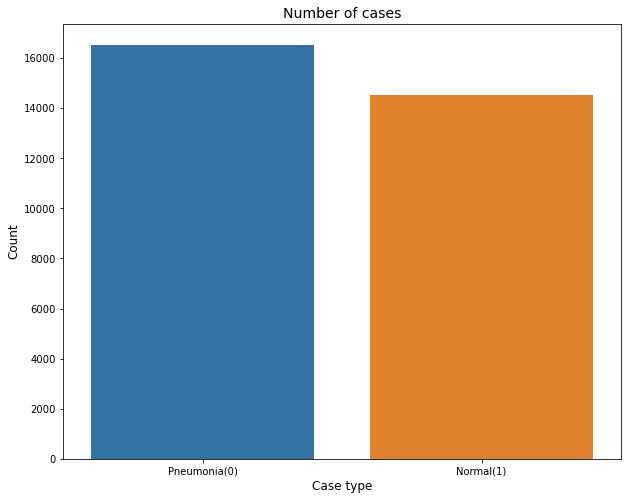

,image,label
0,000db696-cf54-4385-b10b-6b16fbb3f985.jpg,1
1,000db696-cf54-4385-b10b-6b16fbb3f985bright.jpg,1
2,000db696-cf54-4385-b10b-6b16fbb3f985rotated.jpg,1
3,001031d9-f904-4a23-b3e5-2c088acd19c6.jpg,1
4,001031d9-f904-4a23-b3e5-2c088acd19c6bright.jpg,1
...,...,...
31059,fff7447f-99ce-4102-87f3-9788b2459eb4.jpg,0
31060,fffba05a-1635-4545-9bbd-57ad4cfe8d27.jpg,0
31061,fffc95b5-605b-4226-80ab-62caec682b22.jpg,0
31062,fffcff11-d018-4414-971a-a7cefa327795.jpg,0


In [34]:
normal_case = []
for dirname, dirnames, filenames in os.walk(normal_dir):
        for filename in filenames:
            normal_case.append(filename)

print(len(normal_case))
          
pneumonia_case = []
for dirname, dirnames, filenames in os.walk(pneumonia_dir):
        for filename in filenames:
            pneumonia_case.append(filename)


train_data_updated = []

for img in normal_case:
    train_data_updated.append((img,1))

for img in pneumonia_case:
    train_data_updated.append((img, 0))

train_data_updated = pd.DataFrame(train_data_updated, columns=['image', 'label'],index=None)

cases_count = train_data_updated['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Pneumonia(0)' , 'Normal(1)'])
plt.show()


train_data_updated
